In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [10]:
df =  pd.read_csv(r"C:\Users\raval\jupyter_notebook\time-series-analysis-and-forcasting\Marathon.csv")

In [11]:
df

,Year,Minutes
0,1897,175.166667
1,1898,162.000000
2,1899,174.633333
3,1900,159.733333
4,1901,149.383333
...,...,...
115,2012,132.666667
116,2013,130.366667
117,2014,128.616667
118,2015,129.283333


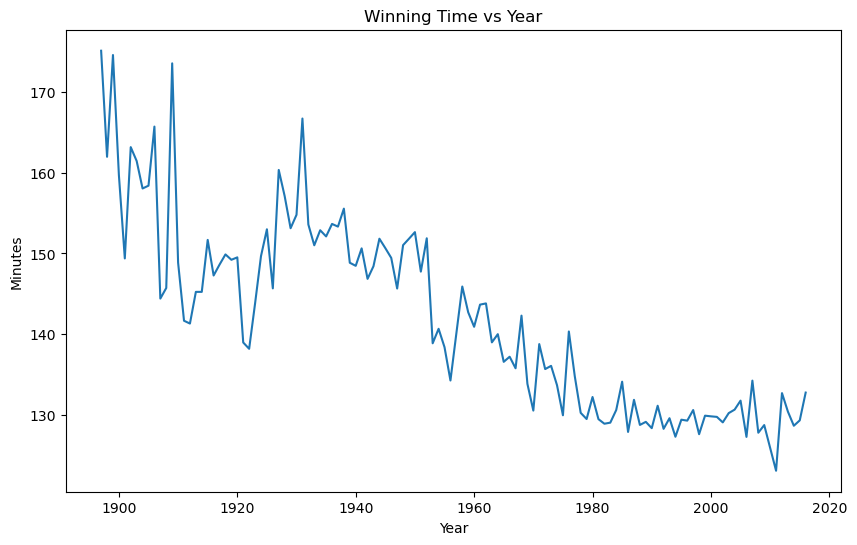

In [23]:
# Task A: Plot the winning time against the year
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Year', y='Minutes', data=df)
plt.plot(df["Year"],df["Minutes"])
plt.title('Winning Time vs Year')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.show()

In [28]:
# Extract features (temperature) and target variable (usage)
X = np.column_stack((np.ones(len(df)), df["Year"]))
y = df.iloc[:, -1].values  # Assuming the last column is the target variable

# Calculate coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients
intercept, slope = theta
print(f'Intercept (theta_0): {intercept:.4f}')
print(f'Slope (theta_1): {slope:.4f}')

Intercept (theta_0): 713.9803
Slope (theta_1): -0.2923


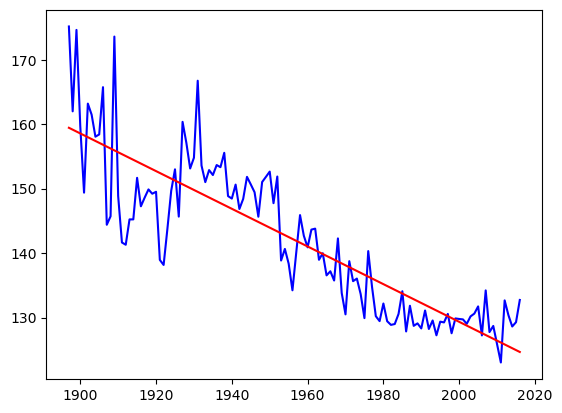

In [24]:
# Create a numpy array of the data
x = np.array(df['Year'])
y = np.array(df['Minutes'])

# Fit a linear regression model
model = np.polyfit(x, y, 1)

# Generate predictions based on the model
y_pred = np.polyval(model, x)

# Plot the data and the regression line
plt.plot(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.show()

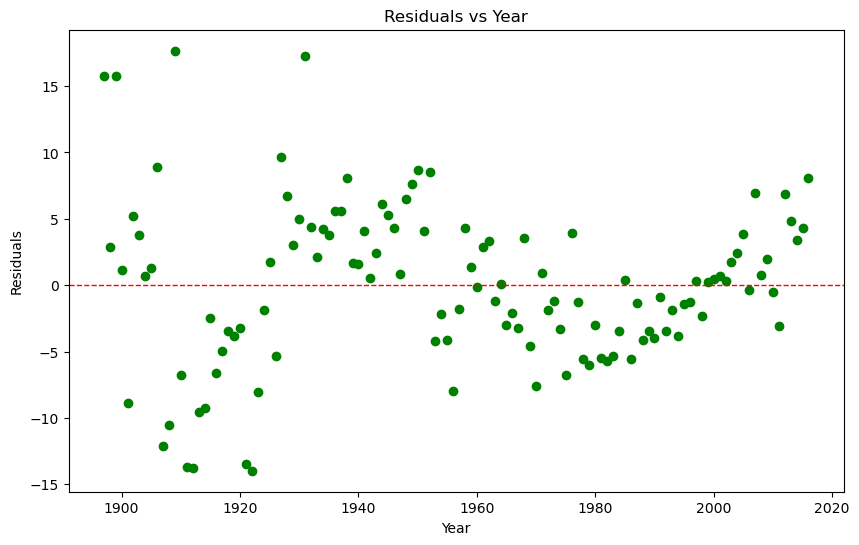

In [25]:
# Calculate residuals
residuals = y - y_pred

# Plot residuals against the year
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.title('Residuals vs Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

In [26]:
year_2020 = 2020
predicted_time_2020 = np.polyval(model, year_2020)

# Calculate the standard error of the estimate
residuals = y - y_pred
standard_error = np.std(residuals)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = standard_error * np.quantile(np.abs(residuals), (1 + confidence_level) / 2)

# Calculate the prediction interval
lower_bound = predicted_time_2020 - margin_of_error
upper_bound = predicted_time_2020 + margin_of_error

# Print the results
print(f"Predicted winning time for men's 400 meters final in 2020: {predicted_time_2020:.2f} minutes")
print(f"Prediction Interval (95% confidence): ({lower_bound:.2f}, {upper_bound:.2f}) minutes")

Predicted winning time for men's 400 meters final in 2020: 123.49 minutes
Prediction Interval (95% confidence): (28.43, 218.55) minutes


In [29]:
2020*(-0.2923)+ 713.9803

123.53430000000003